In [1]:
## COPY THIS NOTEBOOK FOR YOURSELF, into your own home directory or someplace, so you can modify it however you like, 
## add features to it, restructure it however you like, and adapt it to whatever future projects in any way you like!

In [2]:
# This library has useful mathematical and array-manipulation stuff
import numpy as np


# This library is for making all sorts of plots and graphs
import matplotlib.pyplot as plt

In [3]:
# Specify the name of the first energy test file we will be loading in.
# Depending on where you've put it, maybe something like this:
textfilename = "energy_data_1.txt"
# ...or, if it's located somewhere else, you may need to give it a full path name.  (See the "Hello, world" script for 
# similar examples.)


In [4]:
# A general-purpose function to open a file, and read each line one by one, and turn it into an array of numbers.
# The "def" command lets you "define" a function that:
# -- takes some input (in this case, the name of the file)
# -- does something with it (in this case, open it and read the numbers line by line), and
# -- return something to the user (in this case, a "numpy array" full of the numbers)
def read_a_file(fname):
    energy_array = np.array([])  # define an empty array to begin with
    with open(fname,'r') as f:  # open the file
        for line in f:    # loop over each line in the file...
            # Each line is a string containing just one number -- convert it to a float, and add it to the result
            energy_array = np.append(energy_array, float(line))
    return energy_array  # return this to the user


In [5]:
# Actually read the first one in, by calling the function we defined in the previous cell.
e1 = read_a_file(textfilename)

# Print the first 5 entries, just to make sure it looks like an array of numbers...
print(e1[:5])

[43431.234 13776.971 12176.919 14653.413 11878.247]


In [6]:
## A quick demonstration of what "numpy" can do with an array of numbers.
## ----------------------------------------------------------------------
# Take the "natural log" (base "e") of just ONE number:
a = np.log(100)
print(a)   # <--- this should be about 4.6, because 100 is (e)^(4.6)

# Take the "log-base-10" of just one number.  Note that there is a different command for "natural log" than "log-base-10".
b = np.log10(100)
print(b)   # <--- this should be "2", because 100 is (10)^2  


# Take the "log-base-10" of your whole series of energies, all at once!  
# For every item in the "e1" array, its log10 is an item in this new array.
# (One could write a loop that goes through the numbers one by one and take their log10's, but "numpy" is smart and 
# this is faster, and just one line):
loge1 = np.log10(e1)

# Print the first 5 entries, just to make sure they looks like the log (base-10) of the numbers in the previous cell.
print(loge1[:5])
print(f"Number of entries in e1: {len(e1)}")

4.605170185988092
2.0
[4.63780217 4.13915374 4.08553742 4.16593879 4.07475235]
Number of entries in e1: 10000


In [7]:
# Note: "ln" is how I would write "natural log (base e)" on a piece of paper, but this is not how this software does it. 
# In numpy, "log" is base-e, and "log10" is base-10.
# So this line should spit out an error, because the function doesn't exist:
# c = np.ln(100)

# Comment this line out if you want the whole notebook to run smoothly again. :)

(array([9.878e+03, 9.800e+01, 9.000e+00, 4.000e+00, 4.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([ 10001.155 , 100480.2211, 190959.2872, 281438.3533, 371917.4194,
        462396.4855, 552875.5516, 643354.6177, 733833.6838, 824312.7499,
        914791.816 ]),
 <BarContainer object of 10 artists>)

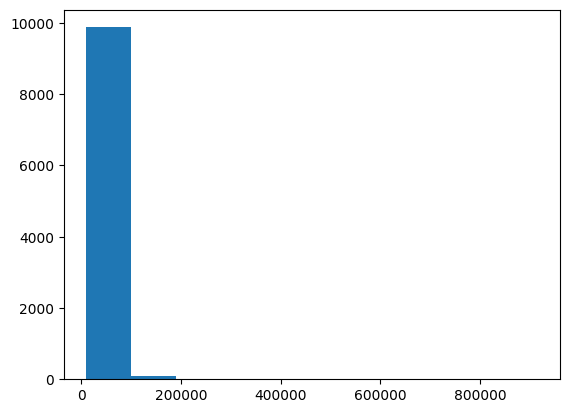

In [8]:
# Make a histogram of these particles' energies:
# We'll do this once, together!
# ======================================================

# First, let's try out the "hist" command, which creates a histogram of the list of numbers we feed into it:
plt.hist(e1)

Text(0.5, 1.0, 'This plot is hard to read.')

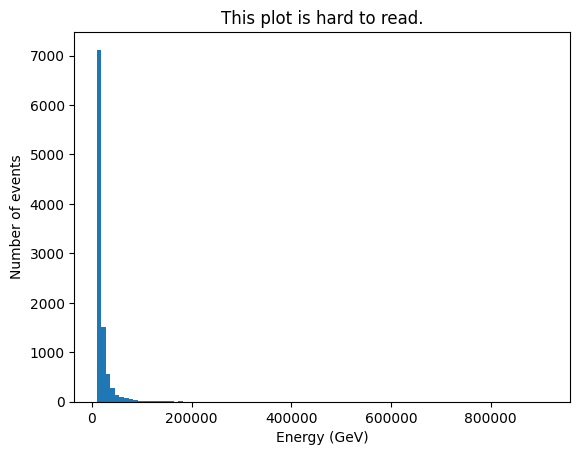

In [9]:
# ^^^ Wow, that looks kind of "blocky".  This is because the default number of bins in python is just 10, which is very coarse... 
# We'll increase this to 100 bins, to make it smoother:
nbins = 100

# Make the histogram with 100 bins instead, and this time also label the x- and y-axes
plt.hist(e1, bins=nbins)
plt.xlabel("Energy (GeV)")
plt.ylabel("Number of events")
plt.title("This plot is hard to read.")

# Better, no?

Text(0.5, 1.0, "The yscale('log') option")

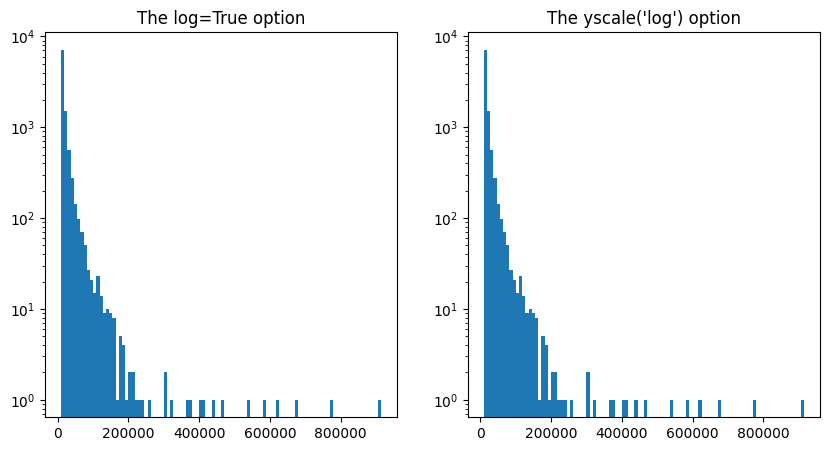

In [10]:
## NOTICE ^^^ In this plot, the lowest energy bin is the one with the most amount of events in it.
## All of the other bins have much fewer events, and this makes the histogram hard to read; 
## that first bin really dominates the picture and doesn't let you see much else.
## "What is going on at higher energies?" is something that is buried down in a part of the plot where you can't see it.

## To see better what is going on:
## Make the y-axis of the plot LOG SCALE instead of linear scale
## There are a couple ways to do this... We'll try two different methods.
## We'll use this opportunity to learn how to make "two plots side by side"

plt.figure(figsize=[10,5]) # This creates a canvas and sets its length and width

# Option 1: add "log=True" to the command that creates the histogram:
# ---------
plt.subplot(1,2,1)  # divide the canvas up into a 1 x 2 grid of panels, and go to panel 1.
plt.hist(e1, bins=nbins, log=True)
plt.title("The log=True option")

# Option 2: create the histogram the normal way, and then tell the plotter to display the y-axis using log scale:
# ---------
plt.subplot(1,2,2)  # divide the canvas up into a 1 x 2 grid of panels, and go to panel 2.
plt.hist(e1, bins=nbins)
plt.yscale('log')    # <-- set this to 'linear' if you want to go back to the default later
plt.title("The yscale('log') option")

## What it should look like: two graphs that look the same as each other.


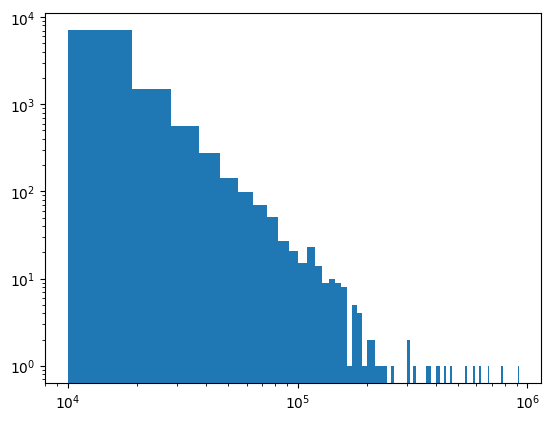

In [11]:
## ^^^^ Hmmm... Now we can better see that there are small numbers of events populating some of the bins...
## Bit it is still difficult to tell what is going on.
## After all, the higher the energy, the fewer events there are... and power-laws are pretty extreme in that behavior.

## To see even better what is going on:
## Make the x-axis of the plot ALSO LOG SCALE instead of linear scale.
## If both the x- and y-axes are log scale, this is a "log-log" plot.
## Try doing this by creating the histogram as above, but also telling the plotter to show the xaxis in log scale:
plt.hist(e1, bins=nbins, log=True)
plt.xscale('log')

# Notice how the numbers and tick marks on the x-axis has changed.
# Also, it should look like a "straight line", which is what a power law is supposed to look like when plotted log-log!

Text(0.5, 1.0, 'A power law really does look like a line in log-log!')

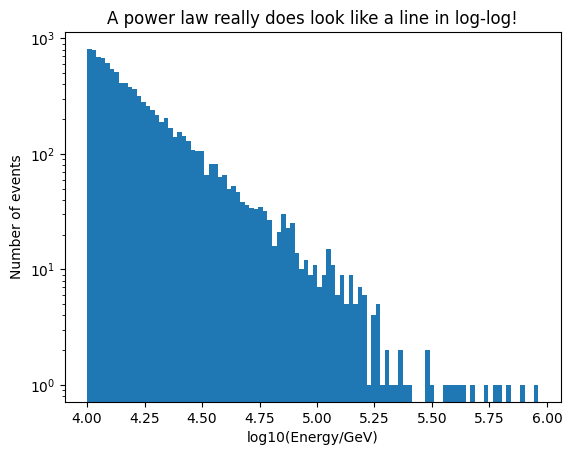

In [12]:
## ...but we can still do better!  Notice that the bins are "big and fat" at the low-energy end, and "thin" at the high-energy end.
## The bin sizes are not evenly spaced in log, which is not making the best use of the data.

## What would be better is to have the bins be narrow where the energy is low (and there are lots of events), and have the
## bins be wider where the energy is high (and there are fewer of them).  This will fill the structure more evenly, making 
## better use of the information.

## To do this, we will create the histogram using log(E) as "the data", instead of E.
## This will make the bins evenly-spaced in the log10 of the energy, rather than evenly-spaced in energy. 
## Here's what that looks like:
plt.hist(np.log10(e1), bins=nbins, log=True)
plt.xlabel("log10(Energy/GeV)")  # While we're doing this, let's make it pretty!
plt.ylabel("Number of events")
plt.title("A power law really does look like a line in log-log!")


In [13]:
## ======== NOW FOR THE FUN PART ============

## FIND THE SPECTRAL INDEX OF THIS DATA!

## I'm not going to guide you through this bit... you'll have to figure out how.  There isn't necessarily just one way to do it, either.
## There are probably several.
## You may have to call upon your "curve fitting" skills from the "scipy_fit_tutorial"!
## Good luck!

In [14]:
## When you think you've got the spectral index of "energy_data_1.txt", 
## REPEAT for energy data files 2, 3, and 4.
## You can either re-use this notebook, or add to this one, or start a fresh one, whichever you'd prefer.

## Do these data look different?  What spectral indeces do they have?....